<a href="https://colab.research.google.com/github/TanuRajput110/Spark-Foundation-Internship/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Sparks Foundation**

**Graduate Rotational Internship (GRIP)**

**January 2023 Batch**

Candidate Name : Tanu Rajput




##**Task 1 : Prediction Using Supervised ML**

Objective of the Task is to train the ML Model is to prediction the percentage of the student based on the no. of studies hours.

**Simple Linear Regression Problem**

In [61]:
# Mount the google drive in google colab. 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [63]:
# importing library called warning to ignore warnings.
import warnings
warnings.filterwarnings("ignore")

In [64]:
#Loading dataset
df = pd.read_csv('/content/drive/MyDrive/spark foundation/csv/task_1.csv', index_col=[0])

In [65]:
# peeking at the first five rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [66]:
#shape of dataset
df.shape

(25, 2)

In [67]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 600.0 bytes


In [68]:
# checking duplicate values if any
df.duplicated().sum()

0

In [69]:
# checking the null values
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [70]:
#the statistical description of the features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [71]:
# checking the correlation of the given data

df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


##**EDA---------Let's Explore the data visually**

**Linear Regression**:----Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

Linear regression performs exceptionally well for linearly separable data so we have.

It can handle overfitting using dimensionlity reduction techniques and cross validation and regularization.

It is sensitive to missing values.

linear regression needs the relationship between the independent and dependent variables to be linear. It is also important to check for outliers since linear regression is sensitive to outlier effects.

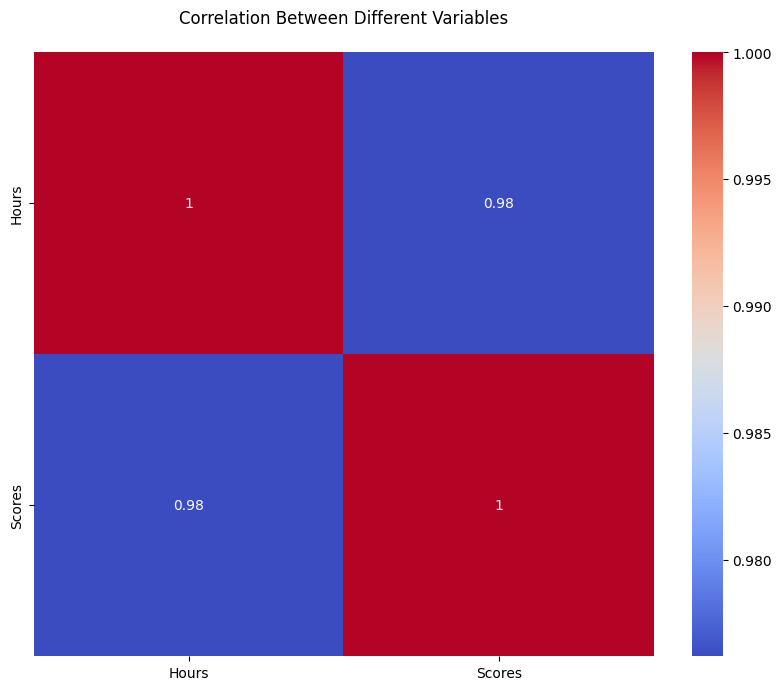

In [72]:
#Let's see the correlation visually
plt.figure(figsize=(10,8))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(abs(df.corr()),cmap='coolwarm', annot=True)     
plt.show()

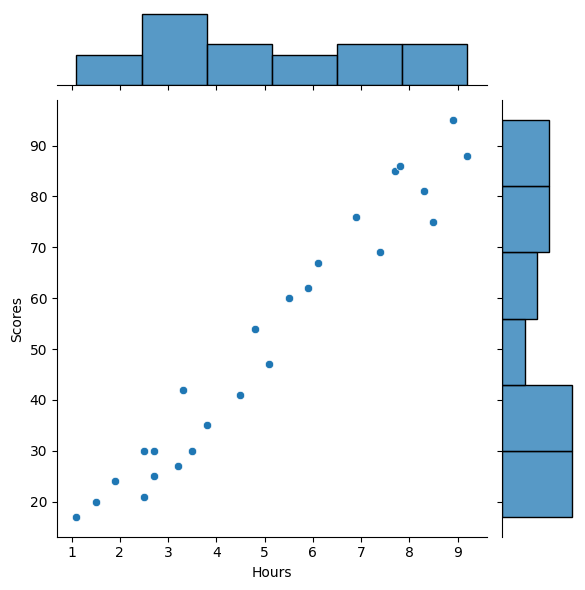

In [73]:
# checking the relation between hours and percentage via  scatterplot with histogram
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.jointplot(x =df['Hours'], y =df['Scores'])

**we have a positive linear relationship in both the columns.**

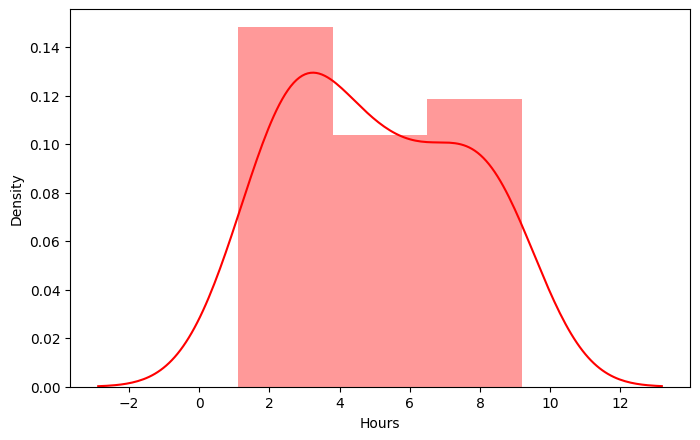

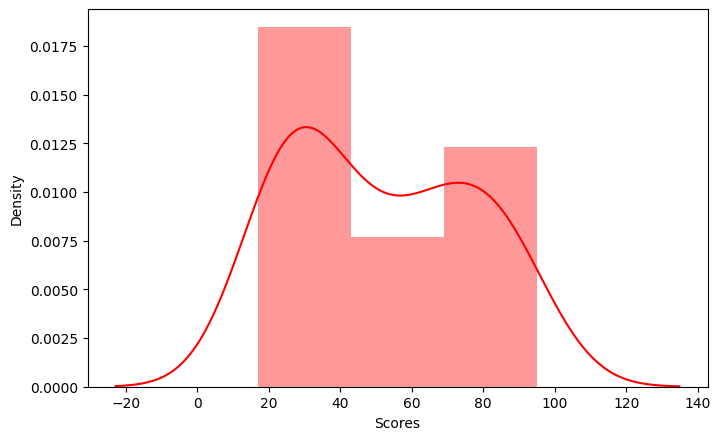

In [74]:
#Let's check the distribution of the Hours and Scores  columns

for i in df.columns:
  plt.figure(figsize=(8,5))
  sns.distplot(df[i], color ='red')

**Both features are almost Normalize,So we don't need to apply transformation on these(specially on target column)(i.e.,Scores).**

##**Preparing the Data For Modelling.**

In [75]:
#separating the dependent and independent variables
x=df.drop('Scores', axis=1) # independent variable
y=df['Scores'] ## dependent variable

In [76]:
x.shape

(25, 1)

In [77]:
y.shape

(25,)

In [78]:
#Splitting the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 51)

print('Shape of x_train : ', x_train.shape)
print('Shape of y_train : ', y_train.shape)
print('Shape of x_test : ', x_test.shape)
print('Shape of y_test : ', y_test.shape)

Shape of x_train :  (17, 1)
Shape of y_train :  (17,)
Shape of x_test :  (8, 1)
Shape of y_test :  (8,)


##**Training of Model**

In [79]:
# Regression Model Building 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#fitting the model 

lr.fit(x_train, y_train)

LinearRegression()

In [80]:
# Let's see the  coefficients and intercepts

print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

Coefficients:  [9.61405732]
Intercept:  3.370382388693166


In [81]:
#to see the training set score
lr.score(x_train, y_train)

0.9548526458597515

***We can clearly see that we have a good training which means that the model fits so well.***

In [82]:
#let's predict the values for test data
predicted_value=lr.predict(x_test)
predicted_value

array([56.24769763, 77.39862373, 69.70737788, 83.16705812, 29.32833714,
       52.40207471, 74.51440654, 34.1353658 ])

***Let's Calculate some evaluation Metrics....***

In [83]:
#......... mean absolute percentage error
mse=  mean_squared_error(y_test,predicted_value) 
print("MSE :" , mse)
#.......... r2 score
r2 = r2_score(y_test**2,predicted_value**2)  #.......... r2 score
print("R2 :" ,r2)
# ........adjusted r2 score    
adj_r2=1-(1-r2_score(y_test**2,predicted_value**2))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))  
print("Adjusted_R2 : ",adj_r2)

MSE : 28.38869937955701
R2 : 0.9146148263286777
Adjusted_R2 :  0.900383964050124


##**Let's see the difference between actual and predicted scores**


In [84]:
#Actual value vs Prediction value

prediction = pd.DataFrame({'Actual Value':y_test,'Prediction Value':predicted_value})
prediction

,Actual Value,Prediction Value
7,60,56.247698
10,85,77.398624
23,76,69.707378
8,81,83.167058
20,30,29.328337
1,47,52.402075
19,69,74.514407
2,27,34.135366


##**It's time to predict the value(scores) when the student studies for 9.25 hours**



In [86]:
# predicting the score when student studies for 9.25 hours
hours = [[9.25]]
predicted_score = lr.predict(hours)
predicted_score


array([92.30041257])

In [88]:
print("No of Hours = ",hours)
print("Predicted Score = ",predicted_score[0])

No of Hours =  [[9.25]]
Predicted Score =  92.3004125718524


According to the Regression Model If a Student studies for 9.25 hours a day probabily the Percentage of the score is 92.30.